In [1]:
import numpy as np
filePath = "rcv1_train.binary"

In [2]:
def readData(filePath):
    with open(filePath) as f:
        data = f.readlines()
    data = [x.strip() for x in data]
    data = data[:200]
    
    data = [x.split() for x in data]
    #this is a sparse representation of the data
    y = [int(x[0]) for x in data]
    x = []
    for i in data:
        new_row = np.zeros(47205)
        for j in i[1:]:
            index = int(j.split(":")[0])
            value = float(j.split(":")[1])
            new_row[index-1] = value
        x.append(new_row)

    x_0 = np.ones((len(x),1))
    x = np.array(x)
    x = np.concatenate((x_0,x),axis=1)
    y = np.array(y)
    return x,y

In [3]:
x, y = readData(filePath)
print(x.shape)
print(y.shape)

(200, 47206)
(200,)


#### Problem 10

In [4]:
experimentTimes = 1000
updateNumList = []
w_length = []
for i in range (experimentTimes):
    now_w_length = []
    np.random.seed(i)
    weight = np.zeros(x.shape[1])
    now_w_length.append(np.linalg.norm(weight))
    correct = 0
    updateNum = 0
    while True:
        index = np.random.randint(0, x.shape[0])
        if np.sign(np.dot(weight, x[index])) == 0:
            prediction = -1
        else:
            prediction = np.sign(np.dot(weight, x[index]))
            
        if prediction != y[index]:
            weight = weight + y[index] * x[index]
            updateNum += 1
            now_w_length.append(np.linalg.norm(weight))
            #reset correct
            correct = 0
        else:
            correct += 1
             
        if correct == 5 * x.shape[0]:
            break
    w_length.append(now_w_length)
    updateNumList.append(updateNum)

median of updateNumList:  102.0


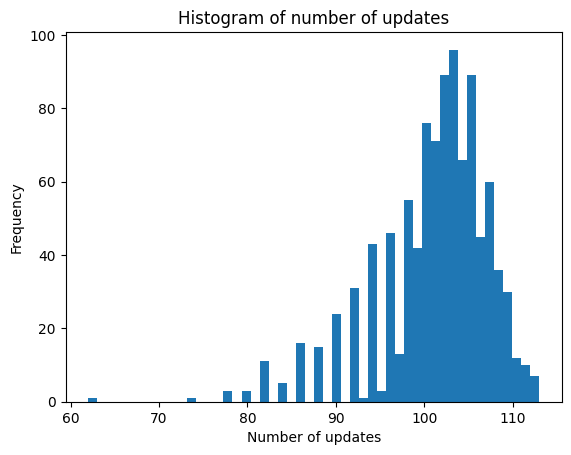

In [5]:
#plot the histogram of updateNumList
import matplotlib.pyplot as plt # type: ignore
plt.hist(updateNumList, bins=50)
plt.xlabel('Number of updates')
plt.ylabel('Frequency')
plt.title('Histogram of number of updates')
print("median of updateNumList: ", np.median(updateNumList))
plt.show()

#### Problem 11

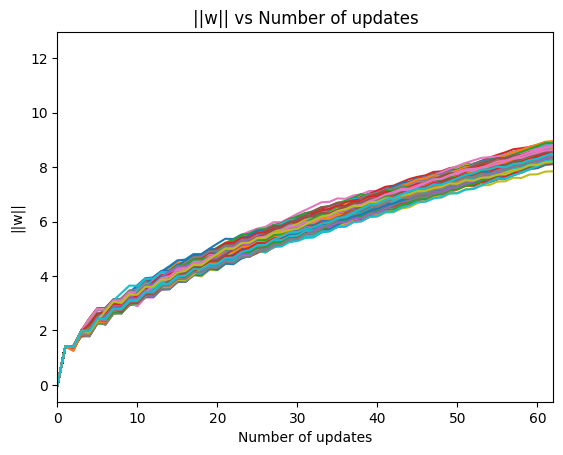

In [6]:
#plot the w_length, 1000 functions on the same figure
for i in range(experimentTimes):
    plt.plot(w_length[i])
    plt.xlabel('Number of updates')
    plt.ylabel('||w||')
    plt.title('||w|| vs Number of updates')
plt.xlim(0, min(updateNumList))
plt.show()

#### Problem 12

In [7]:
experimentTimes = 1
updateNumList = []
w_length = []
for i in range (experimentTimes):
    now_w_length = []
    np.random.seed(i)
    weight = np.zeros(x.shape[1])
    now_w_length.append(np.linalg.norm(weight))
    correct = 0
    updateNum = 0
    tryNew = True
    while True:
        if tryNew == True:
            index = np.random.randint(0, x.shape[0])
        print(index)
        if np.sign(np.dot(weight, x[index])) == 0:
            prediction = -1
        else:
            prediction = np.sign(np.dot(weight, x[index]))
        
        if prediction != y[index]:
            weight = weight + y[index] * x[index]
            tryNew = False
            updateNum += 1
            now_w_length.append(np.linalg.norm(weight))
            #reset correct
            correct = 0
        else:
            correct += 1
            tryNew = True
             
        if correct == 5 * x.shape[0]:
            break
    w_length.append(now_w_length)
    updateNumList.append(updateNum)

172
172
47
47
117
117
192
67
67
195
195
103
103
9
21
36
87
70
70
88
140
58
193
193
39
39
87
174
88
81
165
25
77
72
72
9
148
148
115
197
79
175
192
82
99
177
29
147
147
142
167
32
193
9
9
185
185
127
32
31
151
163
163
114
114
183
183
28
28
34
128
128
164
164
53
53
133
133
38
17
79
79
132
105
42
186
31
120
120
1
65
65
169
169
57
57
35
102
119
11
11
174
174
82
91
128
142
99
53
140
121
170
84
84
68
68
6
196
47
127
131
131
100
180
78
143
143
148
186
23
141
117
85
85
48
49
49
69
169
169
163
192
95
197
94
94
0
0
113
178
178
36
36
162
48
93
131
98
42
42
112
112
149
149
127
0
138
114
43
186
127
23
187
130
121
98
98
62
163
123
195
82
174
148
50
50
155
14
14
41
58
193
36
10
10
86
43
104
11
2
51
51
80
32
182
128
38
19
174
42
115
184
184
188
77
30
24
24
125
125
2
3
3
94
107
13
13
112
112
40
72
19
95
95
72
154
194
180
180
67
61
14
96
4
195
139
86
121
121
109
109
75
184
16
152
157
149
110
25
188
121
118
118
117
189
83
83
161
161
104
160
160
121
70
31
13
71
184
152
79
41
18
40
182
11
166
111
93
129
11

median of updateNumList:  92.0


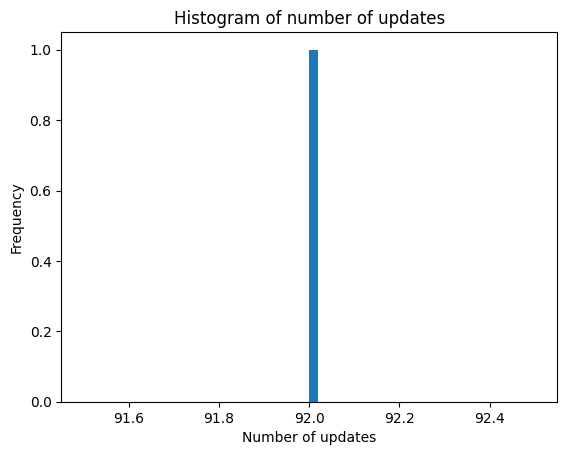

In [8]:
#plot the histogram of updateNumList
import matplotlib.pyplot as plt
plt.hist(updateNumList, bins=50)
plt.xlabel('Number of updates')
plt.ylabel('Frequency')
plt.title('Histogram of number of updates')
print("median of updateNumList: ", np.median(updateNumList))